<a href="https://colab.research.google.com/github/mmdrezaee/UWB_Tracking/blob/main/try5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# LSTM + CNN
import numpy
import glob
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D,Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

WINDOWS_SIZE = 12


def get_data(type):  # type = train, test
    x = []
    y = []
    scaler = MinMaxScaler(feature_range=(0, 1))
    for path in glob.glob(f'/content/drive/MyDrive/try3Data/{type}/**/*.csv'):
        j = 0 if 'haml' in path else 1
        dataSet = read_csv(path)
        data = dataSet[['X', 'Y', 'Z']].to_numpy()
        # normalize X
        data = scaler.fit_transform(data)
        for r in data:
            if len(x) < WINDOWS_SIZE:
                x.append(r)
                if len(x) == WINDOWS_SIZE:
                    y.append(j)
            else:
                x.extend(numpy.vstack([x[1 - WINDOWS_SIZE:], r]))
                y.append(j)
    return numpy.array(x, dtype='float32'), numpy.array(y, dtype='float32')



# load data
trainX, trainY = get_data('train')
testX, testY = get_data('test')
trainX = trainX.reshape(trainX.shape[0] // WINDOWS_SIZE, WINDOWS_SIZE, trainX.shape[1])
testX = testX.reshape(testX.shape[0] // WINDOWS_SIZE, WINDOWS_SIZE, testX.shape[1])
# create and fit the LSTM network
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(Bidirectional(LSTM(200)))  # ,dropout=0.1 , recurrent_dropout=0.2
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=64)
# print(model.summary())
# make predictions
scores = model.evaluate(trainX, trainY, verbose=0)
print('train accuracy', scores[1])
scores = model.evaluate(testX, testY, verbose=0)
print('test accuracy', scores[1])



Epoch 1/30
21/21 [==============================] - 6s 117ms/step - loss: 0.6179 - accuracy: 0.6715 - val_loss: 0.7395 - val_accuracy: 0.5725
Epoch 2/30
21/21 [==============================] - 2s 83ms/step - loss: 0.5433 - accuracy: 0.7243 - val_loss: 0.6546 - val_accuracy: 0.5783
Epoch 3/30
21/21 [==============================] - 2s 83ms/step - loss: 0.4406 - accuracy: 0.7968 - val_loss: 0.7312 - val_accuracy: 0.6340
Epoch 4/30
21/21 [==============================] - 2s 80ms/step - loss: 0.3525 - accuracy: 0.8301 - val_loss: 0.6751 - val_accuracy: 0.6486
Epoch 5/30
21/21 [==============================] - 2s 81ms/step - loss: 0.2992 - accuracy: 0.8565 - val_loss: 0.6519 - val_accuracy: 0.7408
Epoch 6/30
21/21 [==============================] - 2s 84ms/step - loss: 0.2456 - accuracy: 0.8897 - val_loss: 0.4962 - val_accuracy: 0.8243
Epoch 7/30
21/21 [==============================] - 2s 84ms/step - loss: 0.2667 - accuracy: 0.8814 - val_loss: 0.4759 - val_accuracy: 0.7950
Epoch 8/30
2

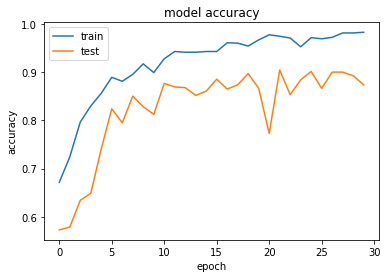

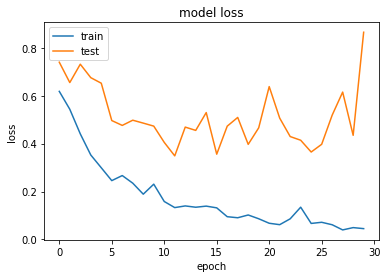

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
testX

array([[[1.6001080e-01, 1.9187208e-02, 1.1557789e-01],
        [1.7997842e-01, 2.3584276e-02, 1.0050251e-02],
        [1.7026444e-01, 2.0386409e-02, 1.2227806e-01],
        ...,
        [2.2908796e-01, 1.1858760e-02, 4.8743719e-01],
        [2.5661090e-01, 3.1179214e-02, 4.7403684e-01],
        [3.0410147e-01, 4.3437708e-02, 9.2127301e-02]],

       [[1.7997842e-01, 2.3584276e-02, 1.0050251e-02],
        [1.7026444e-01, 2.0386409e-02, 1.2227806e-01],
        [1.4543983e-01, 1.1325783e-02, 2.6465660e-01],
        ...,
        [2.5661090e-01, 3.1179214e-02, 4.7403684e-01],
        [3.0410147e-01, 4.3437708e-02, 9.2127301e-02],
        [3.6508363e-01, 6.0226515e-02, 1.8592964e-01]],

       [[1.7026444e-01, 2.0386409e-02, 1.2227806e-01],
        [1.4543983e-01, 1.1325783e-02, 2.6465660e-01],
        [1.5326497e-01, 3.9973352e-04, 2.0100502e-02],
        ...,
        [3.0410147e-01, 4.3437708e-02, 9.2127301e-02],
        [3.6508363e-01, 6.0226515e-02, 1.8592964e-01],
        [4.4576362e-01

In [ ]:
# testX[0][0]
# testY

model.predict(testX)

array([[2.31424570e-02],
       [2.36602724e-02],
       [2.70866752e-02],
       [6.61188066e-02],
       [1.46799892e-01],
       [5.30949175e-01],
       [8.51925850e-01],
       [8.89498651e-01],
       [7.77820349e-01],
       [6.38325036e-01],
       [5.50469875e-01],
       [4.16456282e-01],
       [1.56723946e-01],
       [1.17011368e-01],
       [8.02037716e-02],
       [2.27161348e-02],
       [6.52236342e-02],
       [2.28950083e-02],
       [8.45977664e-03],
       [1.35526061e-03],
       [6.10679388e-03],
       [1.14762664e-01],
       [7.14339614e-02],
       [5.10203838e-03],
       [1.25441551e-02],
       [1.50127113e-02],
       [6.76656067e-02],
       [9.96088386e-02],
       [2.67724991e-02],
       [3.38407457e-02],
       [2.56052017e-02],
       [2.77794302e-02],
       [4.07810211e-02],
       [1.78033412e-02],
       [6.59921765e-03],
       [4.09099460e-03],
       [3.01539898e-03],
       [1.88663602e-03],
       [2.31903791e-03],
       [2.24471092e-03],
